In [9]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict as dd

In [10]:
d = dd(lambda: dd(lambda: dd(lambda: 0)))
d_min = dd(lambda: dd(lambda: dd(lambda: 0)))
d_max = dd(lambda: dd(lambda: dd(lambda: 0)))

path = Path('output/')
for filepath in path.iterdir():
    if ('lock' in str(filepath)):
        continue
    df = pd.read_csv(filepath)
    metadata = str(filepath).split('\\')[1].split('_')[-3:-1]
    # print(metadata)
    for i in df:
        # print(i)
        d[metadata[0]][i][metadata[1]] = np.mean(df[i])
        d_min[metadata[0]][i][metadata[1]] = np.min(df[i])
        d_max[metadata[0]][i][metadata[1]] = np.max(df[i])

# print(d['[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]'])


In [11]:
human_accuracies = [
    [
        '[0.8, 0.75, 0.7, 0.65]',
        '[0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]',
        '[0.8, 0.77, 0.75, 0.72, 0.7, 0.67, 0.65, 0.63, 0.6, 0.57, 0.55, 0.53, 0.5]'
    ],
    [
        '[0.7, 0.7, 0.7, 0.7, 0.7]',
        '[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]',
        '[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]'
        # '[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]'
    ]
]

maps = [
    dict({'human': 'Only Best Human',
        # 'model': 'Only CNN',
        'single_best_policy': 'Combination: Best Human',
        'mode_policy': 'Combination: Best Majority Human',
        'weighted_mode_policy': 'Combination: Best Weighted-Majority Human'
    }),
    dict({'select_all_policy': 'All Humans Selected',
            'random': 'Random Subset Selection',
            'model_prob_based_policy' : 'Pseudo LB Subset Selection without human labels',
            'lb_best_policy': 'True LB Subset Selection',
            'pseudo_lb_best_policy_overloaded': 'Pseudo LB Subset Selection'
    })
]

style = {
    'human': '.-.k',
    'model': '.--k',
    'single_best_policy': 'd-g',
    'mode_policy': 'o-b',
    'weighted_mode_policy': 'x-r',
    'select_all_policy': 'x-g',
    'random': '*-c',
    'model_prob_based_policy': 's-k',
    'lb_best_policy': 'o-r',
    'pseudo_lb_best_policy_overloaded': 'D-b'
}

colors = {
    'g': 'green',
    'b': 'blue',
    'r': 'red',
    'c': 'cyan',
    'k': 'black'
}


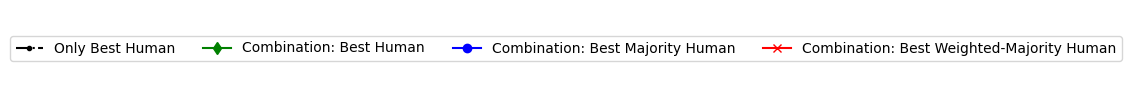

In [12]:
fig = plt.figure(figsize=(1, 1))
# plt.autoscale(tight=True)
ax = fig.add_subplot(1, 1, 1)
i = list(d.keys())[0]
for j in maps[0]:
        # print(j, end=' ')
        ticks = [(k, d[list(d.keys())[0]][j][k]) for k in d[list(d.keys())[0]][j]]
        ticks.sort()
        x = np.array(list(map(int, [i[0] for i in ticks])))
        plt.plot(np.log10(x),
        [i[1] for i in ticks],
        style[j],
        label=(maps[0] | maps[1])[j])
h, l = ax.get_legend_handles_labels()
ax.clear()
ax.legend(h, l, ncol=4, loc='center')
plt.axis('off')
plt.savefig(f'plots/legends_A.pdf', bbox_inches='tight')

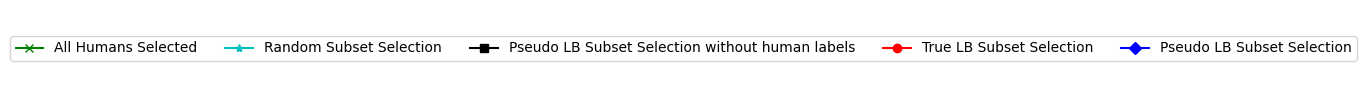

In [13]:
fig = plt.figure(figsize=(1, 1))
ax = fig.add_subplot(1, 1, 1)
i = list(d.keys())[0]
for j in maps[1]:
        ticks = [(k, d[list(d.keys())[0]][j][k]) for k in d[list(d.keys())[0]][j]]
        ticks.sort()
        x = np.array(list(map(int, [i[0] for i in ticks])))
        plt.plot(np.log10(x),
        [i[1] for i in ticks],
        style[j],
        label=(maps[0] | maps[1])[j])
h, l = ax.get_legend_handles_labels()
ax.clear()
ax.legend(h, l, ncol=5, loc='center')
plt.axis('off')
plt.savefig(f'plots/legends_B.pdf', bbox_inches='tight')

[0.7, 0.7, 0.7, 0.7, 0.7]


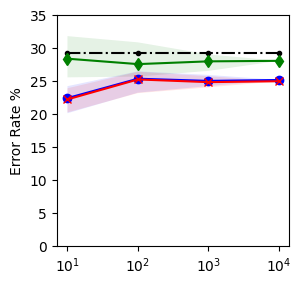

[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


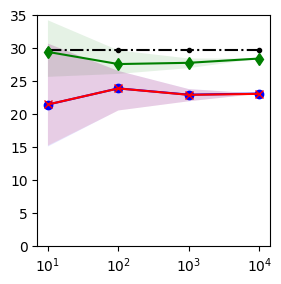

[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


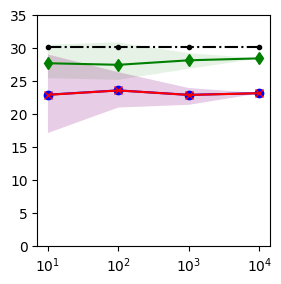

[0.8, 0.75, 0.7, 0.65]


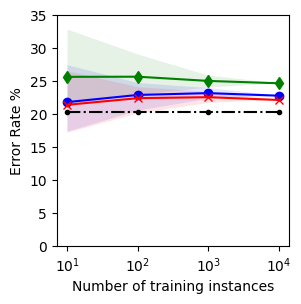

[0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]


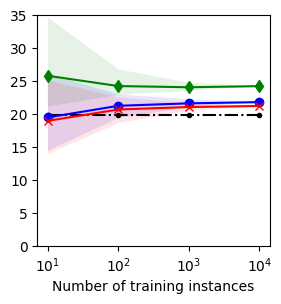

[0.8, 0.77, 0.75, 0.72, 0.7, 0.67, 0.65, 0.63, 0.6, 0.57, 0.55, 0.53, 0.5]


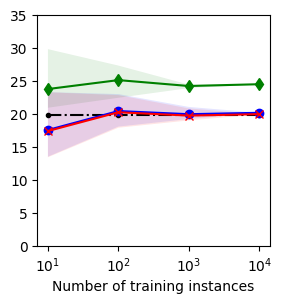

In [14]:
def make_plot(a, b, x, y, rows, cols, name):

    A = []
    for i in a:
        A += human_accuracies[i]
    B = maps[b]

    num = 1

    plt.rcParams['figure.figsize'] = [x, y]
    for i in A:
        for j in B:
            ticks = [(k, d[i][j][k]) for k in d[i][j]]
            ticks_min = [(k, d_min[i][j][k]) for k in d_min[i][j]]
            ticks_max = [(k, d_max[i][j][k]) for k in d_max[i][j]]
            ticks.sort()
            ticks_min.sort()
            ticks_max.sort()
            x = np.array(list(map(int, [i[0] for i in ticks])))
            plt.plot(np.log10(x), [100*(1-i[1]) for i in ticks], style[j], label=B[j])
            plt.fill_between(np.log10(x), [100*(1-i[1]) for i in ticks_min], [100*(1-i[1]) for i in ticks_max], facecolor=colors[style[j][-1]], alpha=0.1)
        plt.xticks(np.log10(x), ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])
        if (num > (rows - 1) * cols):
            plt.xlabel('Number of training instances')
        if (num % cols == 1 or cols == 1):
            plt.ylabel('Error Rate %')
        z = i[1:-1].split(',')
        num += 1
        plt.ylim([0, 35])
        print(i)
        plt.savefig(f'plots/{name}_{i}.pdf', bbox_inches='tight')
        plt.show()

    return

make_plot([1, 0], 0, 3, 3, 2, 3, 'A')

select_all_policy
random
model_prob_based_policy
lb_best_policy
pseudo_lb_best_policy_overloaded
[0.7, 0.7, 0.7, 0.7, 0.7]


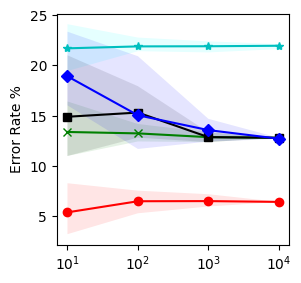

select_all_policy
random
model_prob_based_policy
lb_best_policy
pseudo_lb_best_policy_overloaded
[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


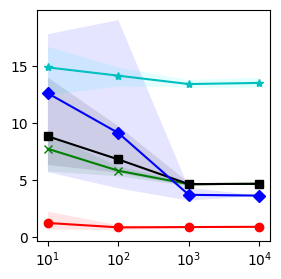

select_all_policy
random
model_prob_based_policy
lb_best_policy
pseudo_lb_best_policy_overloaded
[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


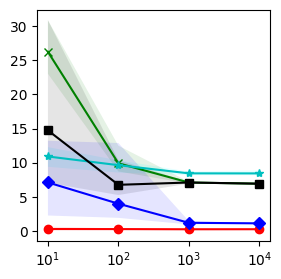

select_all_policy
random
model_prob_based_policy
lb_best_policy
pseudo_lb_best_policy_overloaded
[0.8, 0.75, 0.7, 0.65]


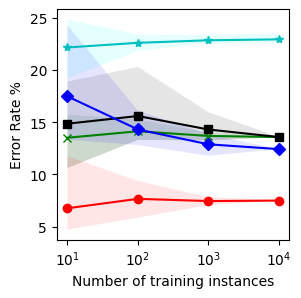

select_all_policy
random
model_prob_based_policy
lb_best_policy
pseudo_lb_best_policy_overloaded
[0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]


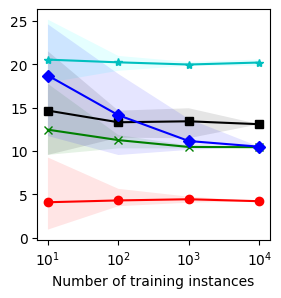

select_all_policy
random
model_prob_based_policy
lb_best_policy
pseudo_lb_best_policy_overloaded
[0.8, 0.77, 0.75, 0.72, 0.7, 0.67, 0.65, 0.63, 0.6, 0.57, 0.55, 0.53, 0.5]


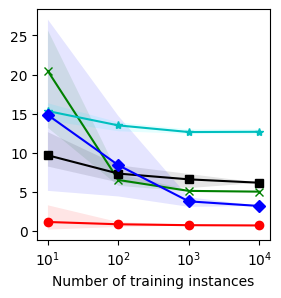

In [15]:
def make_plot(a, b, x, y, rows, cols, name):

    A = []
    for i in a:
        A += human_accuracies[i]
    B = maps[b]
    num = 1

    plt.rcParams['figure.figsize'] = [x, y]

    for i in A:
        for j in B:
            ticks = [(k, d[i][j][k]) for k in d[i][j]]
            ticks_min = [(k, d_min[i][j][k]) for k in d_min[i][j]]
            ticks_max = [(k, d_max[i][j][k]) for k in d_max[i][j]]
            print(j)
            # if(j == 'model_prob_based_policy'):
            #     print("hi")
            #     print(ticks)
            #     print(ticks_min)
            ticks.sort()
            ticks_min.sort()
            ticks_max.sort()
            x = np.array(list(map(int, [i[0] for i in ticks])))
            plt.plot(np.log10(x), [100*(1-i[1]) for i in ticks], style[j], label=B[j])
            plt.fill_between(np.log10(x), [100*(1-i[1]) for i in ticks_min], [100*(1-i[1]) for i in ticks_max], facecolor=colors[style[j][-1]], alpha=0.1)
        plt.xticks(np.log10(x), ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])
        if (num > (rows - 1) * cols):
            plt.xlabel('Number of training instances')
        if (num % cols == 1 or cols == 1):
            plt.ylabel('Error Rate %')
        z = i[1:-1].split(',')
        num += 1
        print(i)
        plt.savefig(f'plots/{name}_{i}.pdf', bbox_inches='tight')
        plt.show()

    return

make_plot([1, 0], 1, 3, 3, 2, 3, 'B')